# **AllLife Bank Customer Segmentation**


**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. 
-

**Identify different segments in the existing customer base**

Variables
- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards 
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Libraries**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [1]:
# Importing all the necessary packages

import pandas as pd
import numpy as np
from pandas import Series,DataFrame # added
import matplotlib.pylab as plt
import seaborn as sns
# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler
# Importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [2]:
data = pd.read_excel('Credit+Card+Customer+Data.xlsx')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### **Check the info of the data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are **660 observations and 7 columns** in the dataset.
- All the columns have 660 non-null values, i.e., there are **no missing values**.
- **All the columns are of integer data type**.

**There are no missing values. Let us now figure out the number of unique values in each column.** 

In [4]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Customer key, which is an identifier, has duplicate values. We will treat the duplicate customer keys before applying any algorithm.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking duplicate customer keys**

As mentioned above, the Customer Key column has duplicate values. Let's find the rows with duplicate customer keys.

### **Drop the rows with duplicate customer keys**

In [6]:
# There are some duplicates in the column 'Customer Key'. 
duplicate_keys = data['Customer Key'].duplicated()
data[duplicate_keys]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


- There are **5 duplicate customer keys**. We can **drop these observations**.

**Note:** We are not making any assumptions about which row with the duplicate keys should be dropped. For example, if row 2 and row 10 have duplicate customer keys, then any one of the two rows can be dropped.

In [7]:
# let's drop duplicate keys

data.drop_duplicates(['Customer Key'], inplace=True )
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


### **Dropping columns** 

We have done some basic checks. Now, **let's drop the variables that are not required for our analysis**.

In [8]:
#data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)
data.drop(columns=['Sl_No', 'Customer Key'], inplace = True)

### **Checking duplicate rows**

Now, that we have dropped unnecessary columns, we can again check for duplicates. **Duplicates would mean customers with identical features.**

In [9]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


- There are 11 duplicate rows. We can drop these duplicate rows from the data.

In [16]:
data = data[~data.duplicated()]

In [17]:
data.shape

(644, 5)

- After removing the duplicate keys, the duplicate rows, and dropping unnecessary columns, there are 644 unique observations and 5 columns in our data.

### **Summary Statistics**

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


**Observations:**

**With describe statistics we can see the numeric values such as count, std, min, max, mean, and qualtiles.**
1. There are 644 customers in the data (unique observations).
2. Each customer has between 1 to 10 credit cards, in average 4.7 (round to 5) credit cards.
3. Visits online are more than visits in the bank.

4. The max number in calls is 10 with with an average of 3.6.

**Now, let's go ahead with exploring each variable at hand.**

### **Check the distribution and outliers for each variable in the data**

- **Check the distribution of all variables**
- **Check outliers for all variables**

Total_Credit_Cards
Skew : 0.17


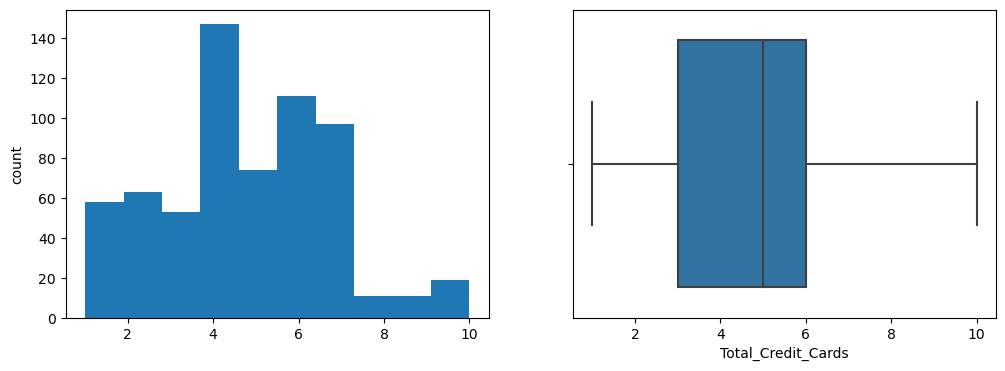

Total_visits_bank
Skew : 0.15


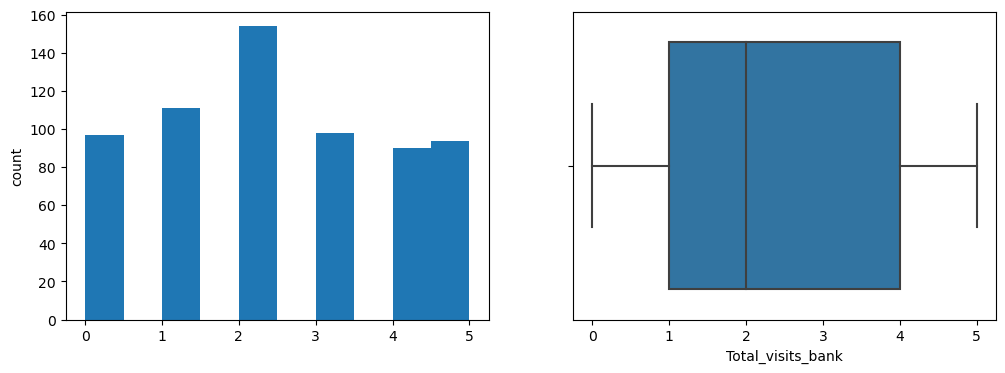

Total_visits_online
Skew : 2.21


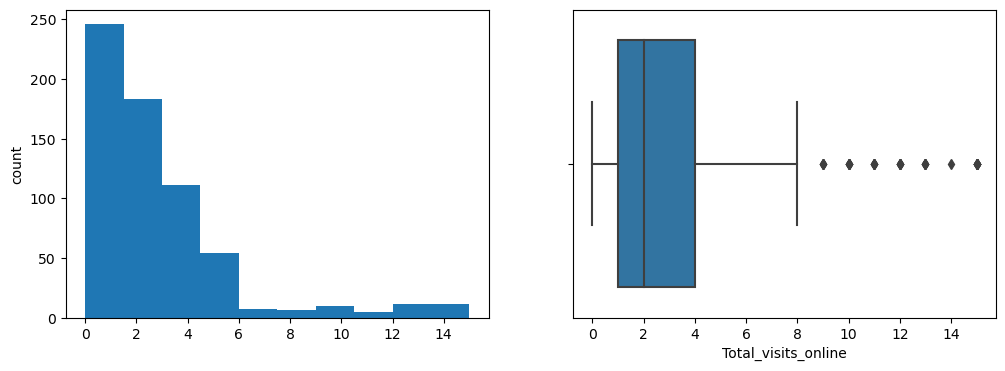

Total_calls_made
Skew : 0.65


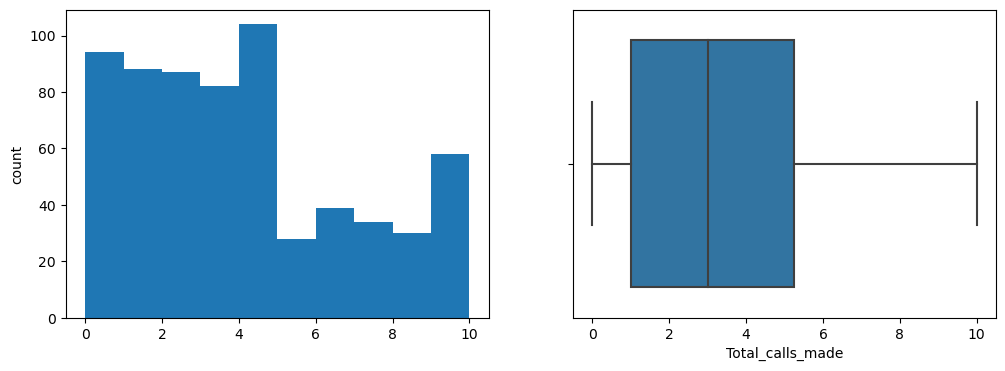

In [19]:
# complete the BELOW code by filling the blanks, before running the cell to avoid any errors 

for col in data.columns[1:]:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (12, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(bins = 10, grid = False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = data[col])
    plt.show()

**Observation:**

-The Credit Limit distribution is right-skewed and few costumers have a credit more than $80.000
-Most of the costumers has 4 credit cards
-The Visits Online distribution is right-skewed and few costumers visits betwen 0-6 times.
-The mode of visits to the bank is 2.

### **Checking correlation**

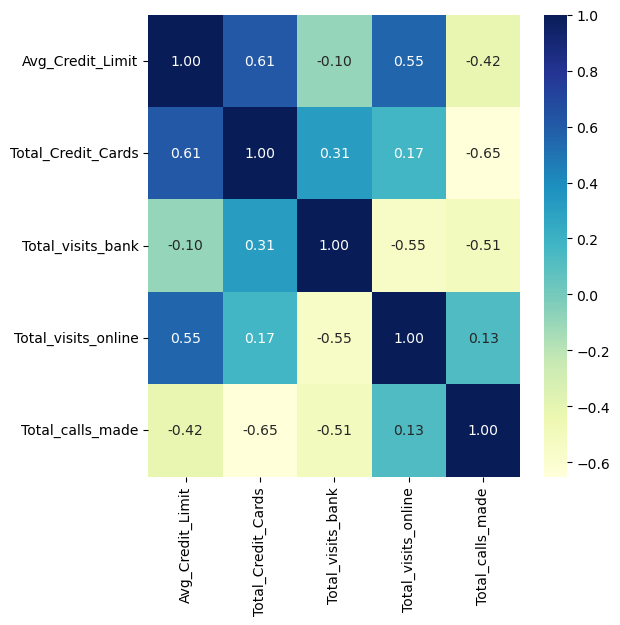

In [20]:
plt.figure(figsize = (6, 6))
sns.heatmap(data.corr(), annot = True, fmt = '0.2f',cmap = "YlGnBu")
plt.show()

**Observations:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards and Total_visits_online which makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

### **Scaling the data**

In [21]:
scaler = StandardScaler()
# Standardize the data to have a mean of ~0 and a variance of 1
data_scaled = StandardScaler().fit_transform(data)

### **Applying PCA on scaled data**

In [22]:
from sklearn.decomposition import PCA

n = data.shape[1]

# Create a PCA instance: pca
pca = PCA(n_components=n)

principal_components = pca.fit_transform(data_scaled)

# Save components to a DataFrame
data_pca = pd.DataFrame(principal_components, columns = data.columns)

In [23]:
# Creating copy of the data to store labels from each algorithm
data_copy = data_pca.copy(deep = True)

## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

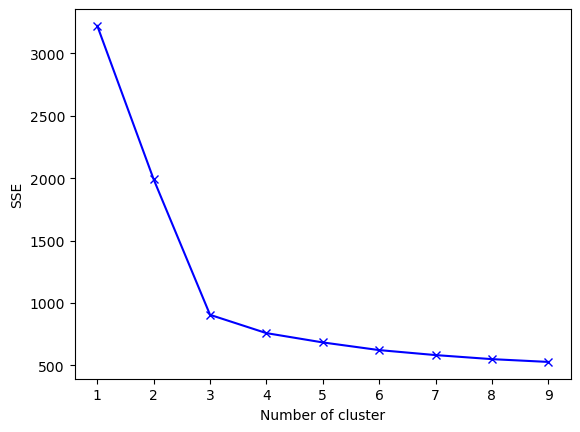

In [24]:
# step 1
sse = {} 
# step 2 - iterate for a range of Ks and fit the pca components to the algorithm. 
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(data_copy)
    sse[k] = kmeans.inertia_     # Use inertia attribute from the clustering object and store the inertia value for that K
# step 3
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

**Interpretation of the elbow plot.**
- The point of inflection on the curve is the best value of k and there is a strong inflection point in 3, that is a good indication that the underlying model fits best at that point.

In [25]:
kmeans = KMeans(n_clusters = 3, random_state = 1) # Apply the K-Means algorithm
kmeans.fit(data_pca) # Fit the kmeans function on the pca components
# Adding predicted labels to the original data and the copied data 
data_copy['Labels'] = kmeans.predict(data_pca)     # Save the predictions on the pca components from K-Means
data['Labels'] = kmeans.predict(data_pca)          # Save the predictions on the pca components from K-Means

We have generated the labels with K-means. Now, let us look at the various features based on the labels.

### **Create the cluster profiles using the below summary statistics and box plots for each label**

In [26]:
# Number of observations in each cluster
data.Labels.value_counts()

1    374
0    221
2     49
Name: Labels, dtype: int64

In [27]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()
median = data.groupby('Labels').median()
df_kmeans = pd.concat([mean, median], axis = 0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


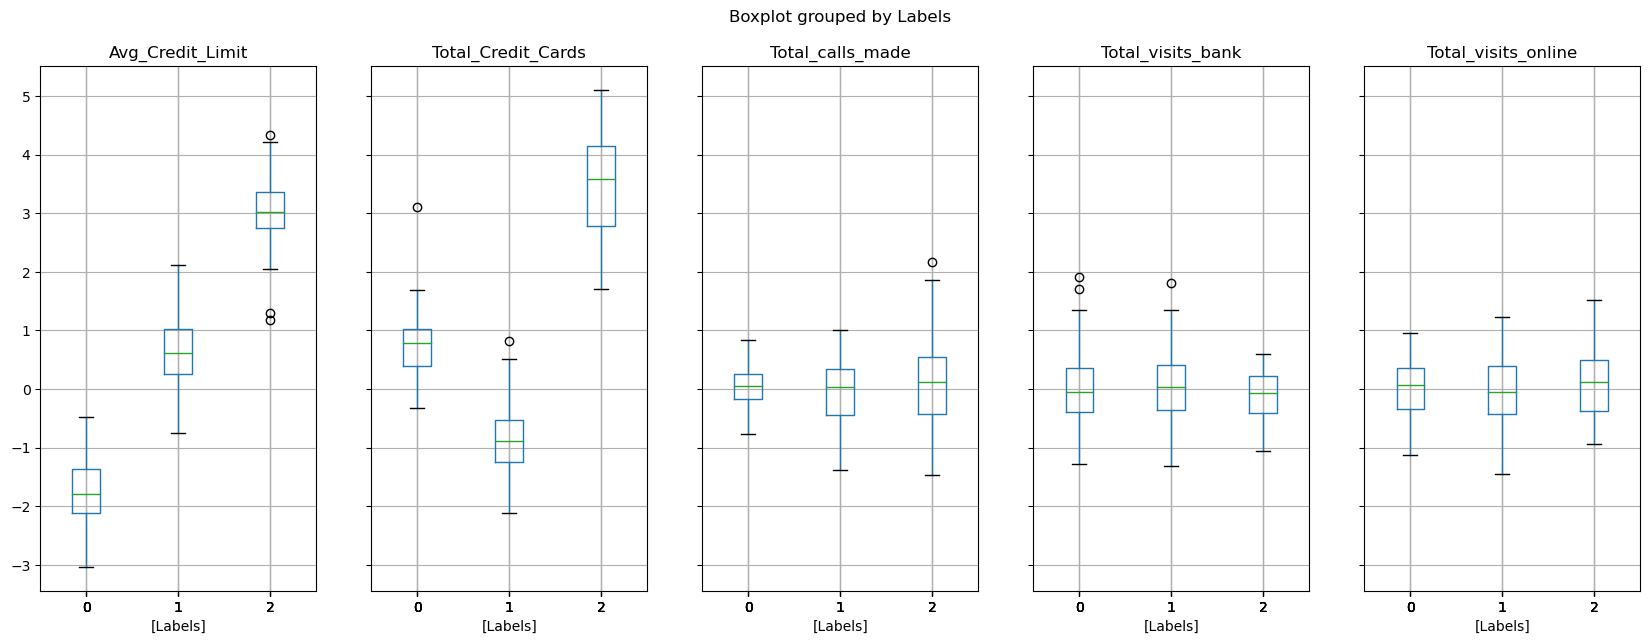

In [28]:
# Visualizing different features w.r.t K-means labels
data_copy.boxplot(by = 'Labels', layout = (1, 5), figsize = (20, 7))
plt.show()
#???? CHECK copied code from practice study clustering mentor class 2 week 3
#cols_visualise = ['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
#for col in cols_visualise:
    #sns.boxplot(x = 'Labels', y = col, data = data_copy)
    #plt.show()

**Cluster Profiles:**

- Cluster 1: LOWEST CREDIT
-The average in credit limit is 12239.8, 2.4 credit cards in average, 0.9 bank visits, online visit 3.6 and calls made 6.9.
- Median results for Cluster 1: Credit limit is 12000, 2 credit cards, 1 bank visits, 4 online visits and 7 calls made.

- Cluster 2: INTERMEDIATE CREDIT
-The average in credit limit is 33893, 5.5 credit cards in average, 3.5 bank visits, online visit 1 and calls made 2.
-Median results for Cluster 2: Credit limit is 31500, 6 credit cards, 3 bank visits, 1 online visits and 2 calls made.
- Cluster 3:  HIGHEST CREDIT
- The average in credit limit is 140102, 8.8 credit cards in average, 0.6 bank visits, online visit 10.9 and calls made 1.1.
-Median results for Cluster 3: Credit limit is 145000, 9 credit cards, 1 bank visits, 11 online visits and 1 calls made.

## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

- **Apply the Gaussian Mixture Model algorithm on the pca components with n_components=3 and random_state=1** 
- **Create the cluster profiles using the below summary statistics and box plots for each label**
- **Compare the clusters from both algorithms - K-means and Gaussian Mixture Model**

In [30]:
gmm = GaussianMixture(n_components = 3, random_state = 1)     # Apply the Gaussian Mixture algorithm on the pca components with n_components=3 and random_state=1
gmm.fit(data_pca)    # Fit the model on the pca components
data_copy['GmmLabels'] = gmm.predict(data_pca)
data['GmmLabels'] = gmm.predict(data_pca)

In [31]:
# Number of observations in each cluster
data.GmmLabels.value_counts()

1    374
0    221
2     49
Name: GmmLabels, dtype: int64

In [32]:
# Calculating the summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]
mean = data.groupby('GmmLabels').mean()
median = data.groupby('GmmLabels').median()
df_gmm = pd.concat([mean, median], axis = 0)
df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


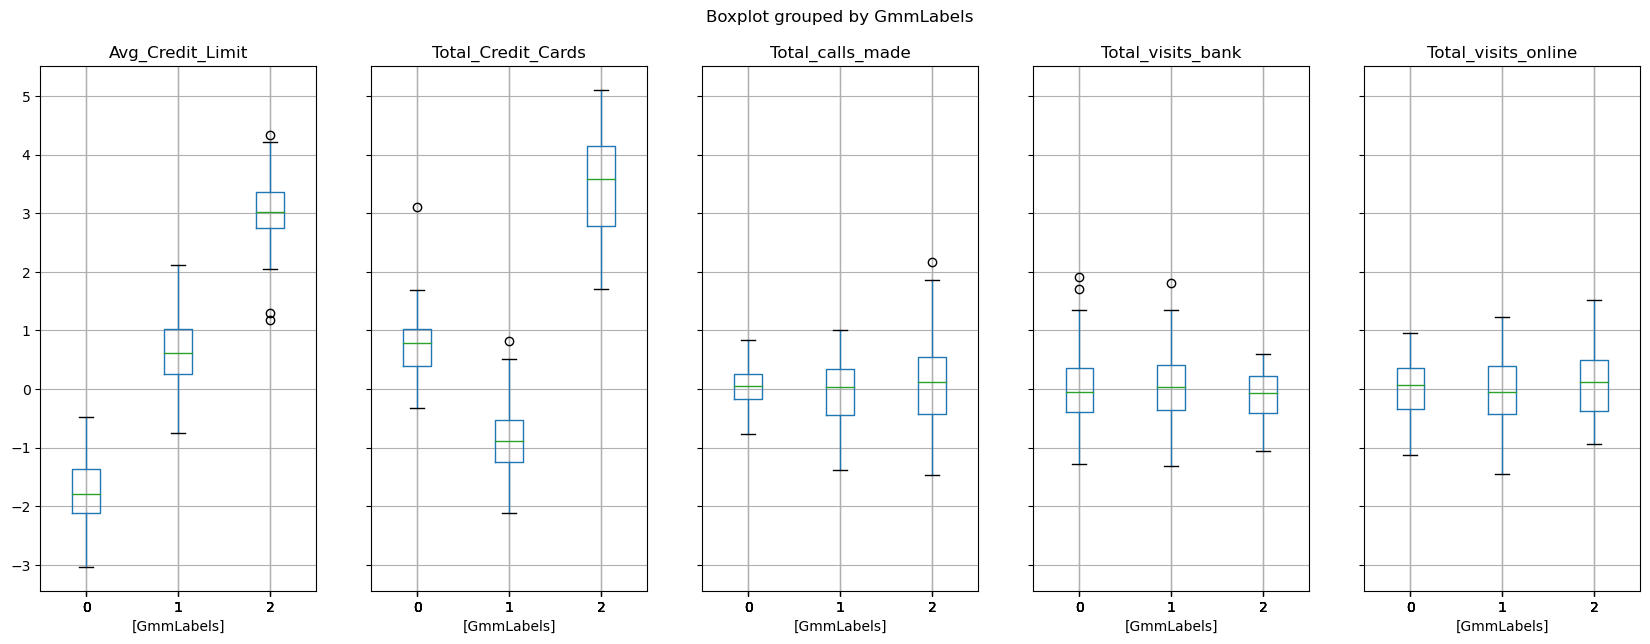

In [33]:
# Plotting boxplots with the new GMM based labels
features_with_labels = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "GmmLabels"]
data_copy[features_with_labels].boxplot(by = 'GmmLabels', layout = (1, 5),figsize = (20, 7))
plt.show()

**Cluster Profiles:**
- Cluster 1: LOWEST CREDIT
-The average in credit limit is 12239.8, 2.4 credit cards in average, 0.9 bank visits, online visit 3.6 and calls made 6.9.
- Median results for Cluster 1: Credit limit is 12000, 2 credit cards, 1 bank visits, 4 online visits and 7 calls made.

- Cluster 2: INTERMEDIATE CREDIT
-The average in credit limit is 33893, 5.5 credit cards in average, 3.5 bank visits, online visit 1 and calls made 2.
-Median results for Cluster 2: Credit limit is 31500, 6 credit cards, 3 bank visits, 1 online visits and 2 calls made.
- Cluster 3:  HIGHEST CREDIT
- The average in credit limit is 140102, 8.8 credit cards in average, 0.6 bank visits, online visit 10.9 and calls made 1.1.
-Median results for Cluster 3: Credit limit is 145000, 9 credit cards, 1 bank visits, 11 online visits and 1 calls made.

The results are the same.

## **K-Medoids**

- **Apply the K-Medoids clustering algorithm on the pca components with n_clusters=3 and random_state=1** 
- **Create cluster profiles using the below summary statistics and box plots for each label**
- **Compare the clusters from both algorithms - K-Means and K-Medoids**

In [34]:
kmedo = KMedoids(n_clusters = 3, random_state = 1)     # Apply the K-Medoids algorithm on the pca components with n_components=3 and random_state=1
kmedo.fit(data_pca)      # Fit the model on the pca components

data_copy['kmedoLabels'] = kmedo.predict(data_pca)

data['kmedoLabels'] = kmedo.predict(data_pca)


In [35]:
# Number of observations in each cluster
data.kmedoLabels.value_counts()

2    289
0    222
1    133
Name: kmedoLabels, dtype: int64

In [36]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('kmedoLabels').mean()
median = data.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis = 0)
df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12216.216216,85052.631579,28449.826990,12000.0,68000.0,20000.0
Total_Credit_Cards,2.423423,7.030075,5.363322,2.0,7.0,5.0
Total_visits_bank,0.950450,1.691729,3.830450,1.0,2.0,4.0
Total_visits_online,3.554054,4.639098,0.982699,4.0,2.0,1.0
Total_calls_made,6.878378,1.969925,1.851211,7.0,2.0,2.0


In [ ]:
# Plotting boxplots with the new K-Medoids based labels

features_with_labels = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "kmedoLabels"]

data_copy[features_with_labels].boxplot(by = 'kmedoLabels', layout = (1, 5), figsize = (20, 7))

plt.show()

**Cluster Profiles:
In K-Medoids the clusters profiles changed:
- Cluster 1: LOWEST CREDIT 
-The average in credit limit is 12216.2, 2.4 credit cards in average, 0.9 bank visits, online visit 3.6 and calls made 6.9.
-Median results for Cluster 1: Credit limit is 12000, 2 credit cards, 1 bank visits, 4 online visits and 7 calls made.
-Cluster 2: HIGHEST CREDIT
-The average in credit limit is 85052.6.8, 7 credit cards in average, 1.7 bank visits, online visit 4.6 and calls made 2.
-Median results for Cluster 2: Credit limit is 68000, 7 credit cards, 2 bank visits, 2 online visits and 2 calls made.
-Cluster 3: INTERMEDIATE CREDIT 
-The average in credit limit is 28450, 5.4 credit cards in average, 3.8 bank visits, online visit 1 and calls made 1.85. 
-Median results for Cluster 3: Credit limit is 20000, 5 credit cards, 4 bank visits, 1 online visits and 2 calls made. 


In [30]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis = 1)[original_features]

comparison.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12216.216216,85052.631579,28449.826990,12000.0,68000.0,20000.0
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.423423,7.030075,5.363322,2.0,7.0,5.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.950450,1.691729,3.830450,1.0,2.0,4.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.554054,4.639098,0.982699,4.0,2.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.878378,1.969925,1.851211,7.0,2.0,2.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


**Comparing Clusters:**

**Cluster Profiles:**


- The cluster with the intermidiate credit, has 6-7 cards, tend to use more in person bank services.
- The cluster with the lowest credit, has less cards (2) and use more phone services.
- The cluster with the highest credit, more cards , between 5-9, tend to use more the online services.


They are different segments in the existing customer base, taking into account the interactions with the bank.

In-person user customer:  They have the medium number of credit cards and the medium available credit. 

Phone user customers: They have fewest credit cards and lowest credit card limit.

Online user customer: They also have the most credit cards and the highest available credit. Least number of customers have this type of behaviour.

Also, the phone and in-person customers should be reached out to promote online banking.


**Comparing Clusters:**
- Compare the clusters from K-Means and K-Medoids:
-  Cluster 1 still has the lowest credit with similar results in both analysis.
-  Cluster 2 and 3 changed significantly:
-  Cluster 2 has the highest credit in K-medoids in compare of K-means that was Cluster 3 with the highest.
- The parameters are lower for K-medoids choosen data points as centers in the case for the credit limit the highest is 68000 and for Kmeans was 145000, means they are just few people tha has that kind of credit, then for the study is better to see the K-medoids.

